In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [114]:
leads = pd.read_csv(r'D:\Personal\deeshma\Study\lead score case study\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')

In [115]:
leads.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [116]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Data Cleaning

In [117]:
(leads.isnull().sum()*100/9240).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [118]:
#drop columns with more than 40% null values

In [119]:
leads=leads.drop(['Lead Quality','Asymmetrique Activity Index', 'Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index'], axis=1)

In [120]:
for column in leads.columns:
    print(leads[column].astype('category').value_counts())
    print("__________________________________________________")

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
__________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
__

In [121]:
# columns with select drop down : Specialization, How did you hear about X Education, Lead Profile, City. 
# Specialization column can be retained as it may be important.
# Country coulmn mqy be deleted as it is not important.

In [122]:
leads=leads.drop(['Lead Profile', 'How did you hear about X Education', 'City', 'Country'], axis=1)

In [123]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [124]:
# deleting columns: Do Not Email, Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, A free copy of Mastering The Interview, What matters most to you in choosing a course, Tags

In [125]:
leads=leads.drop(['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'What matters most to you in choosing a course', 'Tags'], axis=1)

In [126]:
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation    2690
Specialization                     1438
TotalVisits                         137
Page Views Per Visit                137
Last Activity                       103
Lead Source                          36
Prospect ID                           0
Lead Number                           0
Lead Origin                           0
Converted                             0
Total Time Spent on Website           0
Last Notable Activity                 0
dtype: int64

In [127]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [128]:
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                        130
Page Views Per Visit               130
Last Activity                      103
Lead Source                         36
Specialization                      18
Prospect ID                          0
Lead Number                          0
Lead Origin                          0
Converted                            0
Total Time Spent on Website          0
What is your current occupation      0
Last Notable Activity                0
dtype: int64

In [129]:
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [130]:
leads.isnull().sum().sort_values(ascending=False)

Lead Source                        29
Specialization                     18
Prospect ID                         0
Lead Number                         0
Lead Origin                         0
Converted                           0
TotalVisits                         0
Total Time Spent on Website         0
Page Views Per Visit                0
Last Activity                       0
What is your current occupation     0
Last Notable Activity               0
dtype: int64

In [131]:
leads = leads[~pd.isnull(leads['Lead Source'])]

In [132]:
leads.isnull().sum().sort_values(ascending=False)

Specialization                     18
Prospect ID                         0
Lead Number                         0
Lead Origin                         0
Lead Source                         0
Converted                           0
TotalVisits                         0
Total Time Spent on Website         0
Page Views Per Visit                0
Last Activity                       0
What is your current occupation     0
Last Notable Activity               0
dtype: int64

In [133]:
leads = leads[~pd.isnull(leads['Specialization'])]

In [134]:
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Last Notable Activity              0
dtype: int64

In [135]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Modified


In [136]:
leads=leads.drop(['Prospect ID','Lead Number'],axis=1)

In [137]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6373 non-null   object 
 1   Lead Source                      6373 non-null   object 
 2   Converted                        6373 non-null   int64  
 3   TotalVisits                      6373 non-null   float64
 4   Total Time Spent on Website      6373 non-null   int64  
 5   Page Views Per Visit             6373 non-null   float64
 6   Last Activity                    6373 non-null   object 
 7   Specialization                   6373 non-null   object 
 8   What is your current occupation  6373 non-null   object 
 9   Last Notable Activity            6373 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 547.7+ KB


### Dummy variable creation

In [138]:
dummy = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                              'Last Notable Activity']], drop_first=True, dtype=int)

In [139]:
leads = pd.concat([leads, dummy], axis=1)

In [140]:
# Creating dummy variable for 'Specialization' column

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [141]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6373 entries, 0 to 9239
Data columns (total 79 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           6373 non-null   object 
 1   Lead Source                                           6373 non-null   object 
 2   Converted                                             6373 non-null   int64  
 3   TotalVisits                                           6373 non-null   float64
 4   Total Time Spent on Website                           6373 non-null   int64  
 5   Page Views Per Visit                                  6373 non-null   float64
 6   Last Activity                                         6373 non-null   object 
 7   Specialization                                        6373 non-null   object 
 8   What is your current occupation                       6373 non-

In [142]:
# dropping duplicate cloulmns 

In [143]:
leads=leads.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity','Specialization'], axis=1)

### Train - Test Split

In [144]:
X = leads.drop('Converted', axis=1)
y = leads['Converted']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [146]:
fit_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = MinMaxScaler()
X_train[fit_cols] = scaler.fit_transform(X_train[fit_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,False
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [147]:
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


### Model building

In [148]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [149]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', False, 50),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 37),
 ('Last Activity_Converted to Lead', False, 26),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Acti

In [150]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [151]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2094.4
Date:                Mon, 23 Sep 2024   Deviance:                       4188.8
Time:                        23:29:23   Pearson chi2:                 4.92e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3598
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0318      0.610     -1.692      0.091      -2.227       0.163
TotalVisits                                              9.6750      2.784      3.476      0.001       4.219      15.131
Total Time Spent on Website                              4.4599      0.184     24.201      0.000       4.099       4.821
Lead Origin_Lead Add Form                                2.9836      1.187      2.513      0.012       0.657       5.311
Lead Source_Olark Chat                                   1.4640      0.122     11.997      0.000       1.225       1.703
Lead Source_Reference                                    1.2246      1.210      1.012      0.312      -1.147       3.596
Lead Source_Welingak Website                             3.2963      1.555      2.120      0.034       0.249       6.343
Last Activity_Email Bounced                             -1.6916      0.366     -4.625      0.000      -2.409      -0.975
Last Activity_Had a Phone Conversation                   1.0754      0.984      1.093      0.274      -0.853       3.004
Last Activity_SMS Sent                                   1.1088      0.082     13.585      0.000       0.949       1.269
What is your current occupation_Housewife               22.6894   2.45e+04      0.001      0.999   -4.79e+04     4.8e+04
What is your current occupation_Student                 -1.1259      0.639     -1.762      0.078      -2.379       0.127
What is your current occupation_Unemployed              -1.3232      0.604     -2.190      0.029      -2.507      -0.139
What is your current occupation_Working Professional     1.2999      0.633      2.055      0.040       0.060       2.540
Last Notable Activity_Had a Phone Conversation          23.2092   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Last Notable Activity_Unreachable                        2.8181      0.807      3.491      0.000       1.236       4.400
========================================================================================================================
"""

In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.18
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.61
12,What is your current occupation_Working Profes...,1.57


In [153]:
# removing Lead Origin_Lead Add Form from the model
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [154]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2098.2
Date:                Mon, 23 Sep 2024   Deviance:                       4196.4
Time:                        23:29:24   Pearson chi2:                 4.92e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0146      0.609     -1.665      0.096      -2.209       0.179
TotalVisits                                              9.3468      2.759      3.388      0.001       3.939      14.754
Total Time Spent on Website                              4.4378      0.184     24.159      0.000       4.078       4.798
Lead Source_Olark Chat                                   1.4485      0.122     11.918      0.000       1.210       1.687
Lead Source_Reference                                    4.1912      0.264     15.876      0.000       3.674       4.709
Lead Source_Welingak Website                             6.2625      1.011      6.195      0.000       4.281       8.244
Last Activity_Email Bounced                             -1.6949      0.365     -4.637      0.000      -2.411      -0.979
Last Activity_Had a Phone Conversation                   1.0726      0.983      1.091      0.275      -0.854       2.999
Last Activity_SMS Sent                                   1.1099      0.082     13.611      0.000       0.950       1.270
What is your current occupation_Housewife               22.6814   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1293      0.639     -1.768      0.077      -2.381       0.122
What is your current occupation_Unemployed              -1.3231      0.604     -2.192      0.028      -2.506      -0.140
What is your current occupation_Working Professional     1.2946      0.632      2.048      0.041       0.056       2.534
Last Notable Activity_Had a Phone Conversation          23.2086   2.07e+04      0.001      0.999   -4.06e+04    4.07e+04
Last Notable Activity_Unreachable                        2.8105      0.807      3.483      0.000       1.229       4.392
========================================================================================================================
"""

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.64
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.61
11,What is your current occupation_Working Profes...,1.57
2,Lead Source_Olark Chat,1.44
3,Lead Source_Reference,1.32
4,Lead Source_Welingak Website,1.09


In [156]:
# Dropping Last Notable Activity_Had a Phone Conversation

X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [157]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2101.1
Date:                Mon, 23 Sep 2024   Deviance:                       4202.2
Time:                        23:29:24   Pearson chi2:                 4.92e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3579
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0165      0.609     -1.669      0.095      -2.210       0.177
TotalVisits                                              9.4725      2.763      3.429      0.001       4.058      14.887
Total Time Spent on Website                              4.4304      0.184     24.135      0.000       4.071       4.790
Lead Source_Olark Chat                                   1.4486      0.122     11.918      0.000       1.210       1.687
Lead Source_Reference                                    4.1913      0.264     15.876      0.000       3.674       4.709
Lead Source_Welingak Website                             6.2625      1.011      6.195      0.000       4.281       8.244
Last Activity_Email Bounced                             -1.6938      0.365     -4.635      0.000      -2.410      -0.978
Last Activity_Had a Phone Conversation                   2.7977      0.801      3.491      0.000       1.227       4.369
Last Activity_SMS Sent                                   1.1098      0.082     13.614      0.000       0.950       1.270
What is your current occupation_Housewife               21.6832   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1273      0.638     -1.766      0.077      -2.379       0.124
What is your current occupation_Unemployed              -1.3212      0.603     -2.189      0.029      -2.504      -0.138
What is your current occupation_Working Professional     1.2944      0.632      2.048      0.041       0.056       2.533
Last Notable Activity_Unreachable                        2.8096      0.807      3.482      0.000       1.228       4.391
========================================================================================================================
"""

In [158]:
# Dropping What is your current occupation_Housewife

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [159]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2103.4
Date:                Mon, 23 Sep 2024   Deviance:                       4206.8
Time:                        23:29:24   Pearson chi2:                 4.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3572
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4422      0.558     -0.792      0.428      -1.536       0.652
TotalVisits                                              9.2524      2.748      3.367      0.001       3.867      14.638
Total Time Spent on Website                              4.4293      0.184     24.137      0.000       4.070       4.789
Lead Source_Olark Chat                                   1.4433      0.121     11.889      0.000       1.205       1.681
Lead Source_Reference                                    4.1885      0.264     15.873      0.000       3.671       4.706
Lead Source_Welingak Website                             6.2579      1.011      6.190      0.000       4.277       8.239
Last Activity_Email Bounced                             -1.6949      0.365     -4.639      0.000      -2.411      -0.979
Last Activity_Had a Phone Conversation                   2.7995      0.801      3.493      0.000       1.229       4.370
Last Activity_SMS Sent                                   1.1095      0.082     13.611      0.000       0.950       1.269
What is your current occupation_Student                 -1.6970      0.592     -2.867      0.004      -2.857      -0.537
What is your current occupation_Unemployed              -1.8908      0.554     -3.412      0.001      -2.977      -0.805
What is your current occupation_Working Professional     0.7245      0.585      1.239      0.215      -0.422       1.871
Last Notable Activity_Unreachable                        2.8069      0.807      3.477      0.001       1.225       4.389
========================================================================================================================
"""

In [160]:
# Dropping What is your current occupation_Working Professional

X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [161]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2104.1
Date:                Mon, 23 Sep 2024   Deviance:                       4208.2
Time:                        23:29:24   Pearson chi2:                 4.92e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3570
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2153      0.196      1.099      0.272      -0.169       0.599
TotalVisits                                    9.1347      2.740      3.333      0.001       3.763      14.506
Total Time Spent on Website                    4.4306      0.184     24.143      0.000       4.071       4.790
Lead Source_Olark Chat                         1.4429      0.121     11.893      0.000       1.205       1.681
Lead Source_Reference                          4.1882      0.264     15.875      0.000       3.671       4.705
Lead Source_Welingak Website                   6.2565      1.011      6.189      0.000       4.275       8.238
Last Activity_Email Bounced                   -1.6866      0.364     -4.628      0.000      -2.401      -0.972
Last Activity_Had a Phone Conversation         2.8035      0.801      3.499      0.000       1.233       4.374
Last Activity_SMS Sent                         1.1130      0.081     13.671      0.000       0.953       1.273
What is your current occupation_Student       -2.3539      0.280     -8.417      0.000      -2.902      -1.806
What is your current occupation_Unemployed    -2.5480      0.186    -13.733      0.000      -2.912      -2.184
Last Notable Activity_Unreachable              2.8083      0.807      3.479      0.001       1.226       4.390
==============================================================================================================
"""

In [162]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.81
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.52
2,Lead Source_Olark Chat,1.33
3,Lead Source_Reference,1.12
4,Lead Source_Welingak Website,1.08
8,What is your current occupation_Student,1.07
5,Last Activity_Email Bounced,1.04
6,Last Activity_Had a Phone Conversation,1.01


### Model Evaluation

In [163]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.276801
218     0.137801
4171    0.122330
4037    0.290917
3660    0.950830
207     0.188550
2044    0.175148
6411    0.952086
6498    0.063413
2085    0.980638
dtype: float64

In [164]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27680093, 0.13780119, 0.12233007, 0.29091684, 0.95082954,
       0.18855042, 0.17514754, 0.95208603, 0.06341307, 0.98063814])

In [165]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.276801
1,0,0.137801
2,1,0.122330
3,1,0.290917
4,1,0.950830


In [166]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.276801,0
1,0,0.137801,0
2,1,0.122330,0
3,1,0.290917,0
4,1,0.950830,1


In [167]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 563 1586]]


In [168]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.787939923783905


In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
# Calculate the sensitivity

TP/(TP+FN)

0.7380176826430898

In [171]:
# Calculate the specificity

TN/(TN+FP)

0.8343425605536332

In [172]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [173]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

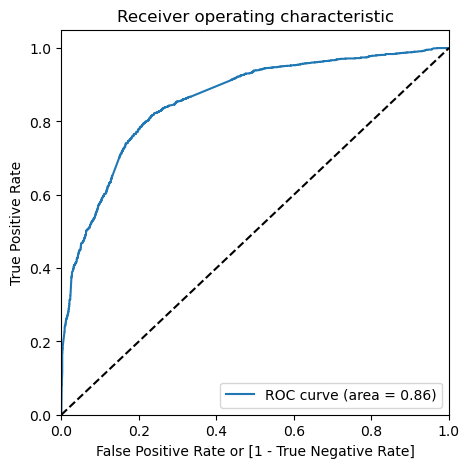

In [174]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [175]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.276801,0,1,1,1,0,0,0,0,0,0,0
1,0,0.137801,0,1,1,0,0,0,0,0,0,0,0
2,1,0.122330,0,1,1,0,0,0,0,0,0,0,0
3,1,0.290917,0,1,1,1,0,0,0,0,0,0,0
4,1,0.950830,1,1,1,1,1,1,1,1,1,1,1


In [176]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.513562  0.991624  0.069204
0.2   0.2  0.691997  0.946952  0.455017
0.3   0.3  0.766196  0.863658  0.675606
0.4   0.4  0.789285  0.802699  0.776817
0.5   0.5  0.787940  0.738018  0.834343
0.6   0.6  0.756333  0.622150  0.881055
0.7   0.7  0.733020  0.537925  0.914360
0.8   0.8  0.710155  0.448581  0.953287
0.9   0.9  0.643578  0.279200  0.982266


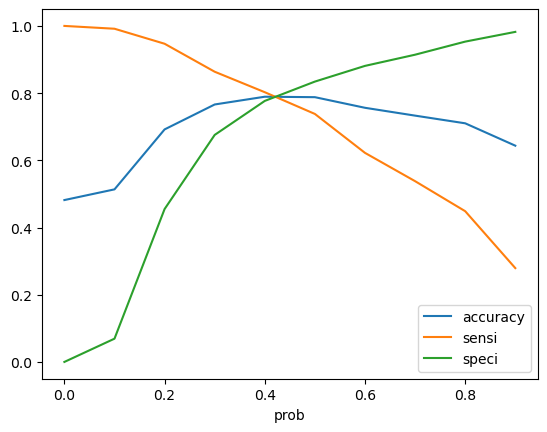

In [177]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [178]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.276801,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.137801,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.122330,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.290917,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.950830,1,1,1,1,1,1,1,1,1,1,1,1


In [179]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.790405738623627

In [180]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[1929  383]
 [ 563 1586]]


In [181]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
TP/(TP+FN)

0.7882736156351792

In [183]:
TN/(TN+FP)

0.7923875432525952

### Prediction on test set

In [184]:
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] =scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])


In [185]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [186]:
X_test_sm = sm.add_constant(X_test[col])

In [187]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,0,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,1,0,0,1,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,1,0,0,1,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,1,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,0,0,0,1,0,0,1,0,0,0


In [188]:
X_test.drop(['Lead Origin_Lead Add Form', 'Last Notable Activity_Had a Phone Conversation', 'What is your current occupation_Housewife', 'What is your current occupation_Working Professional'], axis=1, inplace = True)

In [189]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4771    0.996261
6122    0.123949
9202    0.682881
6570    0.636379
2668    0.695306
4233    0.944853
3368    0.704093
9091    0.451597
5972    0.262776
3631    0.768901
dtype: float64

In [190]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [191]:
y_pred_1.head()

,0
4771,0.996261
6122,0.123949
9202,0.682881
6570,0.636379
2668,0.695306


In [192]:
y_test_df = pd.DataFrame(y_test)

In [193]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [195]:
y_pred_final.head()

,Converted,0
0,1,0.996261
1,0,0.123949
2,0,0.682881
3,1,0.636379
4,1,0.695306


In [196]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [197]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996261
1,0,0.123949
2,0,0.682881
3,1,0.636379
4,1,0.695306


In [198]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [199]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996261,1
1,0,0.123949,0
2,0,0.682881,1
3,1,0.636379,1
4,1,0.695306,1


In [200]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7897489539748954

In [201]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[795, 201],
       [201, 715]], dtype=int64)

In [202]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [203]:
# Calculate sensitivity
TP / float(TP+FN)

0.7805676855895196

In [204]:
# Calculate specificity
TN / float(TN+FP)

0.7981927710843374